In [1]:
import pandas as pd
import numpy as np

### 1 - Credit Data

In [2]:
credit = pd.read_csv("./Downloads/credit.tsv.bz2", sep="\t")
credit.head(7)

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
5,6,80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151
6,7,20.996,3388,259,2,37,12,Female,No,No,African American,203


1.1 - Some basic sanity checks

In [3]:
credit.describe()

,ID,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [4]:
credit.dtypes

ID             int64
Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Gender        object
Student       object
Married       object
Ethnicity     object
Balance        int64
dtype: object

1.2 - Linear regression (OLS) of balance by student status

In [5]:
import statsmodels.formula.api as smf
# Fit regression model
m = smf.ols(formula='Balance ~ Student', data=credit).fit()
# Summary
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Wed, 26 Feb 2020   Prob (F-statistic):           1.49e-07
Time:                        01:49:20   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        480.3694     23.434     20.499      0.000     434.300     526.439
Student[T.Yes]   396.4556     74.104      5.350      0.000     250.771     542.140
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         3.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Takeaways:**

From the model above gives us that people who are **not students** have a predicted balance of \$480, which is the intercept (when Student == No, i.e. Student.Yes = 0).

For someone who **is a student**, _besides_ this balance of \$480 there is a predicted _increase_ of \\$396 to their balance. Therefore, their total balance would be about \$876.

1.2 - Linear regression (OLS) of balance by ethnicity

In [6]:
credit.Ethnicity.value_counts()

Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64

**IMPORTANT**: As we can see by using `value_counts()`, this category is **mutually exclusive**. That is, one cannot be part of more than one ethnicity. If that was not the case, we could possibly see data such as "Caucasian/Asian".

In [7]:
credit.Ethnicity.isna().sum()

0

All of the people in this dataset have an ethnicity, which is only one of 3 possibilities (Caucasian, Asian, African American).

In [8]:
m = smf.ols(formula='Balance ~ Ethnicity', data=credit).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04344
Date:                Wed, 26 Feb 2020   Prob (F-statistic):              0.957
Time:                        01:49:20   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6045.
Df Residuals:                     397   BIC:                             6057.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                531.0000     46.319     11.464      0.000     439.939     622.061
Ethnicity[T.Asian]       -18.6863     65.021     -0.287      0.774    -146.515     109.142
Ethnicity[T.Caucasian]   -12.5025     56.681     -0.221      0.826    -123.935      98.930
==============================================================================
Omnibus:                       28.829   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.395
Skew:                           0.581   Prob(JB):                     1.13e-06
Kurtosis:                       2.460   Cond. No.                         4.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**OBS**: The reason why we do not have a coefficient for "Ethnicity[T.African American]" is because, as we just saw above, this categorical variable is mutually exclusive. So, if one is _neither_ Asian _nor_ Caucasian, they are African American. Besides, we have no null values for this category.

Therefore, the intercept coefficient **already represents** the credit balance for African American individuals, which is \\$531.

For someone who is **Asian**, their balance is about \\$18.69 lower than the \\$531 if African Americans. For **Caucasians**, they have a balance that is about \\$12.50 lower than African Americans'.

1.4 - Linear regression (OLS) of balance by number of cards

In [9]:
# Quick analysis of the variable Cards
credit.Cards.value_counts()

2    115
3    111
4     72
1     51
5     34
6     11
7      4
9      1
8      1
Name: Cards, dtype: int64

In [10]:
# Cards as the int64 variable
m = smf.ols(formula='Balance ~ Cards', data=credit).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.997
Date:                Wed, 26 Feb 2020   Prob (F-statistic):             0.0842
Time:                        01:49:20   Log-Likelihood:                -3017.9
No. Observations:                 400   AIC:                             6040.
Df Residuals:                     398   BIC:                             6048.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    434.2861     54.569      7.958      0.000     327.006     541.566
Cards         28.9869     16.743      1.731      0.084      -3.929      61.903
==============================================================================
Omnibus:                       28.964   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.603
Skew:                           0.566   Prob(JB):                     1.67e-06
Kurtosis:                       2.437   Cond. No.                         8.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# Cards as a categorical variable
m = smf.ols(formula='Balance ~ C(Cards)', data=credit).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.144
Date:                Wed, 26 Feb 2020   Prob (F-statistic):              0.332
Time:                        01:49:20   Log-Likelihood:                -3014.7
No. Observations:                 400   AIC:                             6047.
Df Residuals:                     391   BIC:                             6083.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       531.1373     64.286      8.262      0.000     404.748     657.527
C(Cards)[T.2]   -58.1720     77.236     -0.753      0.452    -210.023      93.679
C(Cards)[T.3]   -39.0742     77.663     -0.503      0.615    -191.763     113.615
C(Cards)[T.4]    45.2794     84.024      0.539      0.590    -119.916     210.475
C(Cards)[T.5]    -8.1373    101.645     -0.080      0.936    -207.977     191.702
C(Cards)[T.6]   149.6809    152.622      0.981      0.327    -150.381     449.743
C(Cards)[T.7]   497.6127    238.379      2.087      0.037      28.947     966.278
C(Cards)[T.8]   106.8627    463.574      0.231      0.818    -804.547    1018.272
C(Cards)[T.9]  -149.1373    463.574     -0.322      0.748   -1060.547     762.272
==============================================================================
Omnibus:                       28.038   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.387
Skew:                           0.568   Prob(JB):                     1.86e-06
Kurtosis:                       2.459   Cond. No.                         22.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Treating Cards as a numerical variable gives us an intercept of \\$434. That is, when the number of cards is 0, that's the person's balance given by our linear regression model. For each _extra card_ one has, their balance increases by about \\$29.

Treating Cards as a categorical variable, however, gives us predicted balances for each possibility of number of cards we have. In this model, the intercept is when a person has 1 card, giving them a balance of \\$531. The other coefficients are the changes in balance **in relation to** this _base value_. For example, the predicted balance for someone who has 4 cards is an increase of \\$45 to the \\$531 someone with only 1 card has.

### 2 - Implementing Categorical-to-Dummies

The objective is to replicate something very similar to `pd.get_dummies` from scratch. Let's do it!

2.1 - Our nice function

In [12]:
# Parameters: The categorical variable, name prefix for the variables, and the reference category to be dropped.
def makeDummies(categoricalVar, varPrefix, reference):
    values = np.zeros((categoricalVar.shape[0], categoricalVar.nunique()))
    for row, value in enumerate(categoricalVar):
        values[row][varPrefix.index(value)] = 1
    df = pd.DataFrame(values, columns=(varPrefix), dtype='int64')
    df.drop(columns=reference, inplace=True)
    return df

2.2 - Experimeting with some variables

In [13]:
studentDummies = makeDummies(credit.Student, ['Yes', 'No'], 'No')
studentDummies.head(7)

,Yes
0,0
1,1
2,0
3,0
4,0
5,0
6,0


In [14]:
ethnicityDummies = makeDummies(credit.Ethnicity, ['African American', 'Asian', 'Caucasian'], 'Caucasian')
ethnicityDummies.head(7)

,African American,Asian
0,0,0
1,0,1
2,0,1
3,0,1
4,0,0
5,0,0
6,1,0


In [15]:
cardsDummies = makeDummies(credit.Cards, [1,2,3,4,5,6,7,8,9], 1)
cardsDummies.head(7)

,2,3,4,5,6,7,8,9
0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0
6,1,0,0,0,0,0,0,0


2.3 - Regression models (and getting the same results)

In [16]:
m = smf.ols(formula='Balance ~ studentDummies', data=credit).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Wed, 26 Feb 2020   Prob (F-statistic):           1.49e-07
Time:                        01:49:20   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        480.3694     23.434     20.499      0.000     434.300     526.439
studentDummies   396.4556     74.104      5.350      0.000     250.771     542.140
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         3.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
m = smf.ols(formula='Balance ~ ethnicityDummies', data=credit).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04344
Date:                Wed, 26 Feb 2020   Prob (F-statistic):              0.957
Time:                        01:49:20   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6045.
Df Residuals:                     397   BIC:                             6057.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             518.4975     32.670     15.871      0.000     454.270     582.725
ethnicityDummies[0]    12.5025     56.681      0.221      0.826     -98.930     123.935
ethnicityDummies[1]    -6.1838     56.122     -0.110      0.912    -116.517     104.149
==============================================================================
Omnibus:                       28.829   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.395
Skew:                           0.581   Prob(JB):                     1.13e-06
Kurtosis:                       2.460   Cond. No.                         3.23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The above results were not exactly the same, but I could not find out why :/

In [18]:
m = smf.ols(formula='Balance ~ cardsDummies', data=credit).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.144
Date:                Wed, 26 Feb 2020   Prob (F-statistic):              0.332
Time:                        01:49:20   Log-Likelihood:                -3014.7
No. Observations:                 400   AIC:                             6047.
Df Residuals:                     391   BIC:                             6083.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         531.1373     64.286      8.262      0.000     404.748     657.527
cardsDummies[0]   -58.1720     77.236     -0.753      0.452    -210.023      93.679
cardsDummies[1]   -39.0742     77.663     -0.503      0.615    -191.763     113.615
cardsDummies[2]    45.2794     84.024      0.539      0.590    -119.916     210.475
cardsDummies[3]    -8.1373    101.645     -0.080      0.936    -207.977     191.702
cardsDummies[4]   149.6809    152.622      0.981      0.327    -150.381     449.743
cardsDummies[5]   497.6127    238.379      2.087      0.037      28.947     966.278
cardsDummies[6]   106.8627    463.574      0.231      0.818    -804.547    1018.272
cardsDummies[7]  -149.1373    463.574     -0.322      0.748   -1060.547     762.272
==============================================================================
Omnibus:                       28.038   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.387
Skew:                           0.568   Prob(JB):                     1.86e-06
Kurtosis:                       2.459   Cond. No.                         22.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3 - Model Airbnb Price

3.1: Loading data and doing basic checks

In [19]:
# Detailed Listings data from Amsterdam
listings = pd.read_csv("./Downloads/listings.csv.gz", sep=",")
listings.head(7)

C:\Users\porto\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20191207212953,2019-12-08,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.13
1,20168,https://www.airbnb.com/rooms/20168,20191207212953,2019-12-08,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,For those who like all facets of city life. In...,17th century Dutch townhouse in the heart of t...,none,Located just in between famous central canals....,...,f,f,strict_14_with_grace_period,f,f,2,0,2,0,2.57
2,25428,https://www.airbnb.com/rooms/25428,20191207212953,2019-12-08,Lovely apt in City Centre (w.lift) near Jordaan,NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.13
3,27886,https://www.airbnb.com/rooms/27886,20191207212953,2019-12-08,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.14
4,28871,https://www.airbnb.com/rooms/28871,20191207212953,2019-12-08,Comfortable double room,NaN,In a monumental house right in the center of A...,In a monumental house right in the center of A...,none,NaN,...,f,f,moderate,f,f,3,0,3,0,2.81
5,29051,https://www.airbnb.com/rooms/29051,20191207212953,2019-12-08,Comfortable single room,because of the city imposing a 4 paying guest ...,In a monumental house right in the center of A...,because of the city imposing a 4 paying guest ...,none,the street is quite lively especially on weeke...,...,f,f,moderate,f,f,3,0,3,0,4.39
6,31080,https://www.airbnb.com/rooms/31080,20191207212953,2019-12-08,2-story apartment + rooftop terrace,NaN,My apartment is light and cosy. The three bed...,My apartment is light and cosy. The three bed...,none,NaN,...,f,f,moderate,f,f,1,1,0,0,0.32


In [20]:
# Many columns, many more rows
listings.shape

(20025, 106)

In [21]:
# Some variables only have null values lol
listings.isna().sum().sort_values(ascending=False)

xl_picture_url                  20025
neighbourhood_group_cleansed    20025
host_acceptance_rate            20025
thumbnail_url                   20025
medium_url                      20025
                                ...  
maximum_nights                      0
minimum_minimum_nights              0
maximum_minimum_nights              0
minimum_maximum_nights              0
id                                  0
Length: 106, dtype: int64

3.2: Data cleaning and manipulation

(a) Convert `price` to numeric

In [22]:
listings.price.dtype

dtype('O')

In [23]:
# A quick look at the 'price' variable, which we want to convert from Object to numeric
listings.price.head(7)

0     $59.00
1     $80.00
2    $125.00
3    $155.00
4     $75.00
5     $55.00
6    $219.00
Name: price, dtype: object

In [24]:
# Removing unwanted characters from the entries
listings.price = listings.price.str.replace(',', '')
listings.price = listings.price.str.replace('$', '')
listings.price.head(7)

0     59.00
1     80.00
2    125.00
3    155.00
4     75.00
5     55.00
6    219.00
Name: price, dtype: object

In [25]:
listings.price = listings.price.astype('float64')

In [26]:
listings.price.dtype

dtype('float64')

(b) Removing entries with missing or invalid values for the most relevant variables for us.

Variables: `price`, `bedrooms`, `room_type`, `accommodates`, `bathrooms`.

`bedrooms`:

In [27]:
listings.bedrooms.value_counts()

1.0     11878
2.0      4824
3.0      1651
0.0      1063
4.0       484
5.0        74
6.0        15
8.0         6
12.0        6
7.0         5
10.0        3
9.0         3
Name: bedrooms, dtype: int64

In [28]:
listings.bedrooms.isna().sum()

13

`room_type`:

In [29]:
listings.room_type.value_counts()

Entire home/apt    15579
Private room        4060
Hotel room           328
Shared room           58
Name: room_type, dtype: int64

In [30]:
listings.room_type.isna().sum()

0

`accommodates`:

In [31]:
listings.accommodates.value_counts()

2     10912
4      6071
3      1577
1       498
6       393
5       385
8        68
7        53
16       30
12       14
10       11
9         7
14        2
13        1
18        1
11        1
17        1
Name: accommodates, dtype: int64

In [32]:
listings.accommodates.isna().sum()

0

In [33]:
listings.bathrooms.value_counts()

1.0    14633
1.5     3899
2.0      933
2.5      259
3.0      102
0.5       83
3.5       46
0.0       34
4.0       17
4.5        7
5.0        3
8.0        2
5.5        1
Name: bathrooms, dtype: int64

The ".5" probably means a toilet only, without a shower.

In [34]:
listings.bathrooms.isna().sum()

6

Dropping null values

In [35]:
listings.dropna(subset=['price', 'bedrooms', 'room_type', 'accommodates', 'bathrooms'])

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20191207212953,2019-12-08,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.13
1,20168,https://www.airbnb.com/rooms/20168,20191207212953,2019-12-08,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,For those who like all facets of city life. In...,17th century Dutch townhouse in the heart of t...,none,Located just in between famous central canals....,...,f,f,strict_14_with_grace_period,f,f,2,0,2,0,2.57
2,25428,https://www.airbnb.com/rooms/25428,20191207212953,2019-12-08,Lovely apt in City Centre (w.lift) near Jordaan,NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.13
3,27886,https://www.airbnb.com/rooms/27886,20191207212953,2019-12-08,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.14
4,28871,https://www.airbnb.com/rooms/28871,20191207212953,2019-12-08,Comfortable double room,NaN,In a monumental house right in the center of A...,In a monumental house right in the center of A...,none,NaN,...,f,f,moderate,f,f,3,0,3,0,2.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20018,40648009,https://www.airbnb.com/rooms/40648009,20191207212953,2019-12-08,Light and spacious apartment in Amsterdam South,Spacious and light apartment in the south of A...,"Our apartment is light and spacious, with some...",Spacious and light apartment in the south of A...,none,Within 15 minutes you can be in the hart of Am...,...,f,f,moderate,f,f,1,1,0,0,NaN
20020,40649791,https://www.airbnb.com/rooms/40649791,20191207212953,2019-12-08,Amsterdam Deluxe Flat w/ Elevator,The Amsterdam Deluxe Flat is centrally located...,It's a light 70m2 apartment. With a king-size ...,The Amsterdam Deluxe Flat is centrally located...,none,This apartment is in the vibrant area called A...,...,f,f,moderate,f,f,1,1,0,0,NaN
20021,40649918,https://www.airbnb.com/rooms/40649918,20191207212953,2019-12-08,Nice Apartment in Amsterdam,Nice house suitable for a maximum of 4 people ...,NaN,Nice house suitable for a maximum of 4 people ...,none,NaN,...,t,f,flexible,f,f,1,1,0,0,NaN
20023,40653547,https://www.airbnb.com/rooms/40653547,20191207212953,2019-12-08,Family apartment for 5 people,"Large apartment, 3 bedrooms, large living with...",NaN,"Large apartment, 3 bedrooms, large living with...",none,The apartment is located at the end of hopping...,...,f,f,moderate,f,f,2,2,0,0,NaN


(c) Let's use the usecols argument for read_csv:

In [36]:
listings_uc = pd.read_csv("./Downloads/listings.csv.gz", 
                          usecols = ["price", "bedrooms", "room_type", "accommodates", "bathrooms"])
listings_uc.head(7)

,room_type,accommodates,bathrooms,bedrooms,price
0,Private room,2,1.5,1.0,$59.00
1,Private room,2,1.0,1.0,$80.00
2,Entire home/apt,3,1.0,1.0,$125.00
3,Private room,2,1.0,1.0,$155.00
4,Private room,2,1.0,1.0,$75.00
5,Private room,1,1.0,1.0,$55.00
6,Entire home/apt,4,1.0,3.0,$219.00


In [37]:
listings_uc.dropna(subset=['price', 'bedrooms', 'room_type', 'accommodates', 'bathrooms'])
listings_uc.price = listings_uc.price.str.replace(',', '')
listings_uc.price = listings_uc.price.str.replace('$', '')
listings_uc.price = listings_uc.price.astype('float64')
listings_uc.price

0         59.0
1         80.0
2        125.0
3        155.0
4         75.0
         ...  
20020    137.0
20021    135.0
20022     60.0
20023     95.0
20024    110.0
Name: price, Length: 20025, dtype: float64

3.3 - Distribution of `price`

In [38]:
import matplotlib.pyplot as plt
plt.hist(listings_uc.price, color='blue', edgecolor='black')
plt.show()

<Figure size 640x480 with 1 Axes>

This distribution is right-skewed, not normal. Therefore a log transformation is recommended.

3.4 - Bedrooms variable manipulation

In [39]:
conditions = [
    (listings_uc['bedrooms'] == 0.0) | (listings_uc['bedrooms'] == 1.0),
    (listings_uc['bedrooms'] == 2.0),
    (listings_uc['bedrooms'] == 3.0),
    (listings_uc['bedrooms'] == 4.0) | (listings_uc['bedrooms'] == 5.0) | (listings_uc['bedrooms'] == 6.0) | (listings_uc['bedrooms'] == 7.0) | (listings_uc['bedrooms'] == 8.0) | (listings_uc['bedrooms'] == 9.0) | (listings_uc['bedrooms'] == 10.0) | (listings_uc['bedrooms'] == 12.0)]
choices = ['1', '2', '3', '4+']
listings_uc['bedrooms_reduced'] = np.select(conditions, choices)
listings_uc.head(7)

,room_type,accommodates,bathrooms,bedrooms,price,bedrooms_reduced
0,Private room,2,1.5,1.0,59.0,1
1,Private room,2,1.0,1.0,80.0,1
2,Entire home/apt,3,1.0,1.0,125.0,1
3,Private room,2,1.0,1.0,155.0,1
4,Private room,2,1.0,1.0,75.0,1
5,Private room,1,1.0,1.0,55.0,1
6,Entire home/apt,4,1.0,3.0,219.0,3


In [40]:
# Converting into dummies
pd.get_dummies(listings_uc.bedrooms_reduced)

,0,1,2,3,4+
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
20020,0,1,0,0,0
20021,0,0,1,0,0
20022,1,0,0,0,0
20023,0,0,0,1,0


In [41]:
listings_uc.bedrooms_reduced.unique()

array(['1', '3', '2', '4+', '0'], dtype=object)

3.5 - OLS of price with bedrooms, dummy version

In [42]:
m = smf.ols(formula='price ~ pd.get_dummies(listings_uc.bedrooms_reduced)', data=listings_uc).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     331.4
Date:                Wed, 26 Feb 2020   Prob (F-statistic):          1.29e-276
Time:                        01:49:22   Log-Likelihood:            -1.3372e+05
No. Observations:               20025   AIC:                         2.675e+05
Df Residuals:                   20020   BIC:                         2.675e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                         171.6673      9.036     18.998      0.000     153.956     189.379
pd.get_dummies(listings_uc.bedrooms_reduced)[0]   -52.2057     44.474     -1.174      0.240    -139.378      34.967
pd.get_dummies(listings_uc.bedrooms_reduced)[1]   -40.8697      9.141     -4.471      0.000     -58.786     -22.953
pd.get_dummies(listings_uc.bedrooms_reduced)[2]    29.3537      9.314      3.151      0.002      11.097      47.611
pd.get_dummies(listings_uc.bedrooms_reduced)[3]    75.0311      9.828      7.635      0.000      55.768      94.294
pd.get_dummies(listings_uc.bedrooms_reduced)[4]   160.3579     11.091     14.458      0.000     138.619     182.097
==============================================================================
Omnibus:                    51443.607   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1203561622.498
Skew:                          29.253   Prob(JB):                         0.00
Kurtosis:                    1202.603   Cond. No.                     2.28e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.89e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

3.6 - The R-squared value is 0.062, so 6.2% indicates that the model explaisn about 6.2% the variability of the response data around its mean. That is, how much variation of the `price` variable is explained by this `bedroom_reduced` variable in this linear regression model.

3.7 - Now with log of price!

In [43]:
listings_uc['log_price'] = np.log(listings_uc.price)

C:\Users\porto\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [44]:
listings_uc.log_price.describe()

count    2.002500e+04
mean             -inf
std               NaN
min              -inf
25%      4.595120e+00
50%      4.867534e+00
75%      5.220356e+00
max      9.104980e+00
Name: log_price, dtype: float64

In [45]:
listings_uc = listings_uc.replace([np.inf, -np.inf], np.nan)
listings_uc.dropna(subset=['log_price'])

,room_type,accommodates,bathrooms,bedrooms,price,bedrooms_reduced,log_price
0,Private room,2,1.5,1.0,59.0,1,4.077537
1,Private room,2,1.0,1.0,80.0,1,4.382027
2,Entire home/apt,3,1.0,1.0,125.0,1,4.828314
3,Private room,2,1.0,1.0,155.0,1,5.043425
4,Private room,2,1.0,1.0,75.0,1,4.317488
...,...,...,...,...,...,...,...
20020,Entire home/apt,3,1.0,1.0,137.0,1,4.919981
20021,Entire home/apt,4,1.0,2.0,135.0,2,4.905275
20022,Private room,2,1.0,NaN,60.0,0,4.094345
20023,Entire home/apt,5,1.5,3.0,95.0,3,4.553877


C:\Users\porto\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\porto\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


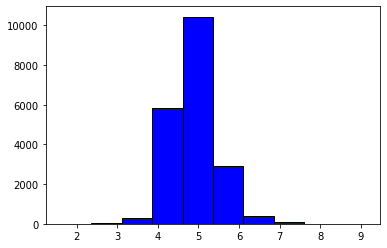

In [46]:
plt.hist(listings_uc.log_price, color='blue', edgecolor='black')
plt.show()

In [47]:
m = smf.ols(formula='log_price ~ bedrooms_reduced', data=listings_uc).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     1498.
Date:                Wed, 26 Feb 2020   Prob (F-statistic):               0.00
Time:                        01:49:22   Log-Likelihood:                -13151.
No. Observations:               20024   AIC:                         2.631e+04
Df Residuals:                   20019   BIC:                         2.635e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4.7313      0.129     36.552      0.000       4.478       4.985
bedrooms_reduced[T.1]      0.0108      0.130      0.083      0.934      -0.243       0.265
bedrooms_reduced[T.2]      0.4454      0.130      3.437      0.001       0.191       0.699
bedrooms_reduced[T.3]      0.6146      0.130      4.729      0.000       0.360       0.869
bedrooms_reduced[T.4+]     0.8712      0.131      6.658      0.000       0.615       1.128
==============================================================================
Omnibus:                     2897.235   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17142.145
Skew:                           0.559   Prob(JB):                         0.00
Kurtosis:                       7.392   Cond. No.                         108.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared value here is much higher compared to the previous one: 23%. Therefore, in terms of R^2, this new model with the natural log of price explains more variability than the previous one.

3.8 - Adding some variables to our model now!

First, let's make transformations on `accommodates` and `bathrooms`

In [48]:
# More practical way
listings_uc['accommodates_reduced'] = ["1" if x == 1 else "2" if x == 2 else "3" if x == 3 
                                       else "4 and more" for x in listings_uc["accommodates"]]
# Converting into dummies
acc_red_dum = pd.get_dummies(listings_uc.accommodates_reduced)

For `bathrooms` now

In [49]:
listings_uc['bathrooms'].value_counts()

1.0    14633
1.5     3899
2.0      933
2.5      259
3.0      102
0.5       83
3.5       46
0.0       34
4.0       17
4.5        7
5.0        3
8.0        2
5.5        1
Name: bathrooms, dtype: int64

In [50]:
conditions = [
    (listings_uc['bathrooms'] == 0.0),
    (listings_uc['bathrooms'] == 0.5) | (listings_uc['bathrooms'] == 1.0),
    (listings_uc['bathrooms'] == 1.5) | (listings_uc['bathrooms'] == 2.0),
    (listings_uc['bathrooms'] == 2.5) | (listings_uc['bathrooms'] == 3.0) | (listings_uc['bathrooms'] == 3.5) | (listings_uc['bathrooms'] == 4.0) | (listings_uc['bathrooms'] == 4.5) | (listings_uc['bathrooms'] == 5.0) | (listings_uc['bedrooms'] == 5.5) | (listings_uc['bedrooms'] == 8.0)]
choices = ['0', '1', '2', '3 and more']
listings_uc['bathrooms_reduced'] = np.select(conditions, choices)
listings_uc.head(7)

# Converting into dummies
bath_red_dum = pd.get_dummies(listings_uc.bathrooms_reduced)

3.9 - Now let's put these two variables and `room_type` to our linear regression model

In [51]:
m = smf.ols(formula='log_price ~ room_type + acc_red_dum + bath_red_dum', data=listings_uc).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     1197.
Date:                Wed, 26 Feb 2020   Prob (F-statistic):               0.00
Time:                        01:49:23   Log-Likelihood:                -11460.
No. Observations:               20024   AIC:                         2.294e+04
Df Residuals:                   20014   BIC:                         2.302e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     3.2847      0.012    270.279      0.000       3.261       3.309
room_type[T.Hotel room]       0.2535      0.024     10.567      0.000       0.206       0.300
room_type[T.Private room]    -0.3541      0.008    -44.081      0.000      -0.370      -0.338
room_type[T.Shared room]     -0.4569      0.057     -8.058      0.000      -0.568      -0.346
acc_red_dum[0]                0.4355      0.016     26.710      0.000       0.404       0.467
acc_red_dum[1]                0.7778      0.007    118.003      0.000       0.765       0.791
acc_red_dum[2]                0.8809      0.010     87.169      0.000       0.861       0.901
acc_red_dum[3]                1.1905      0.007    167.654      0.000       1.177       1.204
bath_red_dum[0]               0.4650      0.053      8.823      0.000       0.362       0.568
bath_red_dum[1]               0.7460      0.015     50.070      0.000       0.717       0.775
bath_red_dum[2]               0.8642      0.015     56.274      0.000       0.834       0.894
bath_red_dum[3]               1.2096      0.022     55.884      0.000       1.167       1.252
==============================================================================
Omnibus:                     4493.580   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36797.367
Skew:                           0.853   Prob(JB):                         0.00
Kurtosis:                       9.418   Cond. No.                     3.83e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.9e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The R^2 value of 0.35 demonstrates that this new models explains more of the variability in our data set and model when compared to the previous models.

Besides, we see that as the number of accomodates increase, the price for the house increases. Same for the number of bathrooms, the more there are the more expensive the place is. On the other hand, the price drops if the room is private or shared, but it increases if it is a hotel room when compared to an entire home/apt.